<h1 align=center><font size = 6,5>Assignment 3 Bank Marketing Dataset</font></h1>

Nama : Dini Aryani

Kode : PYTN-KS19-06

Data ini terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, diperlukan lebih dari satu kontak ke klien yang sama, untuk mengakses apakah produk (deposito berjangka bank) akan berlangganan ('ya') atau tidak ('tidak').

# A. Import Library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# B. Membaca Dataset

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Keterangan :**

   Data klien bank:</br>
   1. age : usia (numerik)</br>
   2. job: jenis pekerjaan (kategori: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student","blue-collar", "self-employed", "retired", "technician", "services") 
   3. marital: status pernikahan (kategori: "married", "divorced", "single"; catatan: "divorced" berarti bercerai atau duda/janda)</br>
   4. education : pendidikan (kategori: "unknown", "secondary", "primary", "tertiary")</br>
   5. default: memiliki kredit macet? (biner: "yes", "no")</br>
   6. balance: rata-rata saldo tahunan, dalam euro (numerik) </br>
   7. housing: memiliki pinjaman rumah? (biner: "yes", "no")</br>
   8. loan: memiliki pinjaman pribadi? (biner: "yes", "no")</br>
   
   terkait dengan kontak terakhir kampanye saat ini:</br>
   9. contact: jenis komunikasi kontak (kategori: "unknown", "telephone", "cellular")</br> 
  10. day: hari terakhir kontak dalam sebulan (numerik)</br> 
  11. month: bulan terakhir kontak dalam setahun (kategori: "jan", "feb", "mar", ..., "nov", "dec")</br> 
  12. duration: durasi kontak terakhir, dalam detik (numerik)</br> 
   
  atribut lain:</br>
  13. campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numerik, termasuk kontak terakhir)</br>
  14. pdays: jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numerik, -1 berarti klien sebelumnya tidak dihubungi)</br>
  15. previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numerik)</br>
  16. poutcome: hasil kampanye pemasaran sebelumnya (kategori: "unknown", "other", "failure", "success")</br>
  17. emp.var.rate : tingkat variasi pekerjaan - indikator triwulan (numeric)</br>
  18. cons.price.idx : indeks harga konsumen - indikator bulanan (numeric)</br>
  19. cons.conf.idx: indeks kepercayaan konsumen - indikator bulanan (numeric)</br>
  20. euribor3m: tarif 3 bulan euribor - indikator harian (numeric)</br>
  21. nr.employed: jumlah karyawan - indikator triwulanan (numeric)</br>

  Variabel keluaran (target yang diinginkan):</br>
  22. y : apakah klien telah berlangganan deposito berjangka? (biner: "yes", "no")

In [3]:
df.shape

(41188, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# C. Data Preprocessing
Data preprocessing adalah serangkaian langkah atau proses yang dilakukan pada data mentah sebelum dianalisis atau dimasukkan ke dalam model pembelajaran mesin. Tujuan utama dari data preprocessing adalah untuk membersihkan, memformat, dan mempersiapkan data agar dapat memberikan hasil analisis atau pelatihan model yang lebih baik.

## C.1. Data Cleaning
Proses data cleaning adalah langkah awal dalam persiapan data dan melibatkan identifikasi, penanganan, dan eliminasi masalah dalam dataset, sehingga data menjadi lebih bersih dan dapat diandalkan.

In [6]:
# mengecek missing value 
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
# menghapus kolom 
df.drop(['pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,no


In [8]:
# mengecek data duplicated
df.duplicated().value_counts()

False    41172
True        16
Name: count, dtype: int64

In [9]:
# menghapus data duplicated
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    41172
Name: count, dtype: int64

## C.2. Label Encoding
Mengubah variabel kategorikal menjadi bentuk yang dapat dimengerti oleh model.
dikarenakan  data hampir semua fitur bertipe object, maka kita langsung melakukan proses label encoding.

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,no


In [11]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Define columns with categorical data
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'y']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column in the new DataFrame
for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Display the original and label-encoded DataFrames
df_encoded.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,y
0,56,3,1,0,0,0,0,1,6,1,261,1,0
1,57,7,1,3,1,0,0,1,6,1,149,1,0
2,37,7,1,3,0,2,0,1,6,1,226,1,0
3,40,0,1,1,0,0,0,1,6,1,151,1,0
4,56,7,1,3,0,0,2,1,6,1,307,1,0


In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41172 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          41172 non-null  int64
 1   job          41172 non-null  int32
 2   marital      41172 non-null  int32
 3   education    41172 non-null  int32
 4   default      41172 non-null  int32
 5   housing      41172 non-null  int32
 6   loan         41172 non-null  int32
 7   contact      41172 non-null  int32
 8   month        41172 non-null  int32
 9   day_of_week  41172 non-null  int32
 10  duration     41172 non-null  int64
 11  campaign     41172 non-null  int64
 12  y            41172 non-null  int32
dtypes: int32(10), int64(3)
memory usage: 2.8 MB


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41172 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41172 non-null  int64 
 1   job          41172 non-null  object
 2   marital      41172 non-null  object
 3   education    41172 non-null  object
 4   default      41172 non-null  object
 5   housing      41172 non-null  object
 6   loan         41172 non-null  object
 7   contact      41172 non-null  object
 8   month        41172 non-null  object
 9   day_of_week  41172 non-null  object
 10  duration     41172 non-null  int64 
 11  campaign     41172 non-null  int64 
 12  y            41172 non-null  object
dtypes: int64(3), object(10)
memory usage: 4.4+ MB


In [14]:
df['y'].value_counts()

y
no     36533
yes     4639
Name: count, dtype: int64

Jumlah sampel pada kelas "yes" (4639) jauh lebih kecil daripada jumlah sampel pada kelas "no" (36533), yang menunjukkan ketidakseimbangan kelas yang signifikan. Pada umumnya, ketidakseimbangan kelas dapat menyebabkan masalah saat melatih model machine learning, terutama jika model cenderung memprediksi kelas mayoritas untuk mencapai akurasi tinggi.

Oleh karena itu, melakukan undersampling pada kelas mayoritas ("no") bisa menjadi pendekatan yang baik untuk menciptakan distribusi kelas yang lebih seimbang. Hal ini dapat membantu model untuk lebih baik dalam memahami kelas minoritas ("yes").

## C.3. Undersampling
Undersampling adalah teknik dalam pemrosesan data yang digunakan untuk menangani ketidakseimbangan kelas dalam masalah klasifikasi. Ketidakseimbangan kelas terjadi ketika jumlah sampel di antara kelas-kelas yang berbeda sangat tidak seimbang, di mana satu kelas memiliki jumlah sampel yang jauh lebih besar daripada kelas lainnya. Ini dapat menyebabkan model cenderung memprediksi kelas mayoritas dan mengabaikan kelas minoritas.

In [15]:
from sklearn.preprocessing import StandardScaler

# Import Library untuk balancing
from sklearn.utils import resample

# membuat 2 dataframe dari majority dan minority class 
df_majority = df_encoded[(df_encoded['y']==0)] 
df_minority = df_encoded[(df_encoded['y']==1)] 

# upsample minority class
df_majority_undersampling = resample(df_majority, replace = True, n_samples = 4639, random_state = 42)

# Combine majority class with upsampled minority class
df_undersampling = pd.concat([df_majority_undersampling, df_minority]) 

In [16]:
df_undersampling.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,y
16504,25,1,2,1,0,0,0,0,3,4,123,2,0
879,48,7,1,3,1,2,0,1,6,4,243,1,0
11693,26,1,2,2,1,0,2,1,4,0,175,14,0
6453,42,1,0,0,0,2,2,1,6,4,738,1,0
17635,51,2,0,6,0,1,1,0,3,1,19,14,0


In [17]:
df_undersampling.reset_index(inplace=True, drop=True)
df_undersampling.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,y
0,25,1,2,1,0,0,0,0,3,4,123,2,0
1,48,7,1,3,1,2,0,1,6,4,243,1,0
2,26,1,2,2,1,0,2,1,4,0,175,14,0
3,42,1,0,0,0,2,2,1,6,4,738,1,0
4,51,2,0,6,0,1,1,0,3,1,19,14,0


In [18]:
df_undersampling['y'].value_counts()

y
0    4639
1    4639
Name: count, dtype: int64

In [19]:
df_undersampling.shape

(9278, 13)

In [20]:
df_encoded.shape

(41172, 13)

**Keterangan :** </br>
Dalam kode di atas, dilakukan undersampling pada dataset yang tidak seimbang (class imbalance). Setelah membagi data antara kelas mayoritas dan minoritas, kelas mayoritas di-undersample sehingga jumlahnya sama dengan kelas minoritas. Ini menghasilkan dataset baru, df_undersampling, dengan jumlah observasi yang seimbang untuk kedua kelas. Dataset yang dihasilkan memiliki 9278 observasi, yang merupakan sekitar seperempat dari dataset awal sebelum undersampling yang memiliki 41172 observasi. Tindakan ini dilakukan untuk meningkatkan kinerja model pada kelas minoritas, menghindari dominasi kelas mayoritas selama pelatihan.    

## C.4. Data Visualisasi

### C.4.1. Melihat distribusi data bertipe object

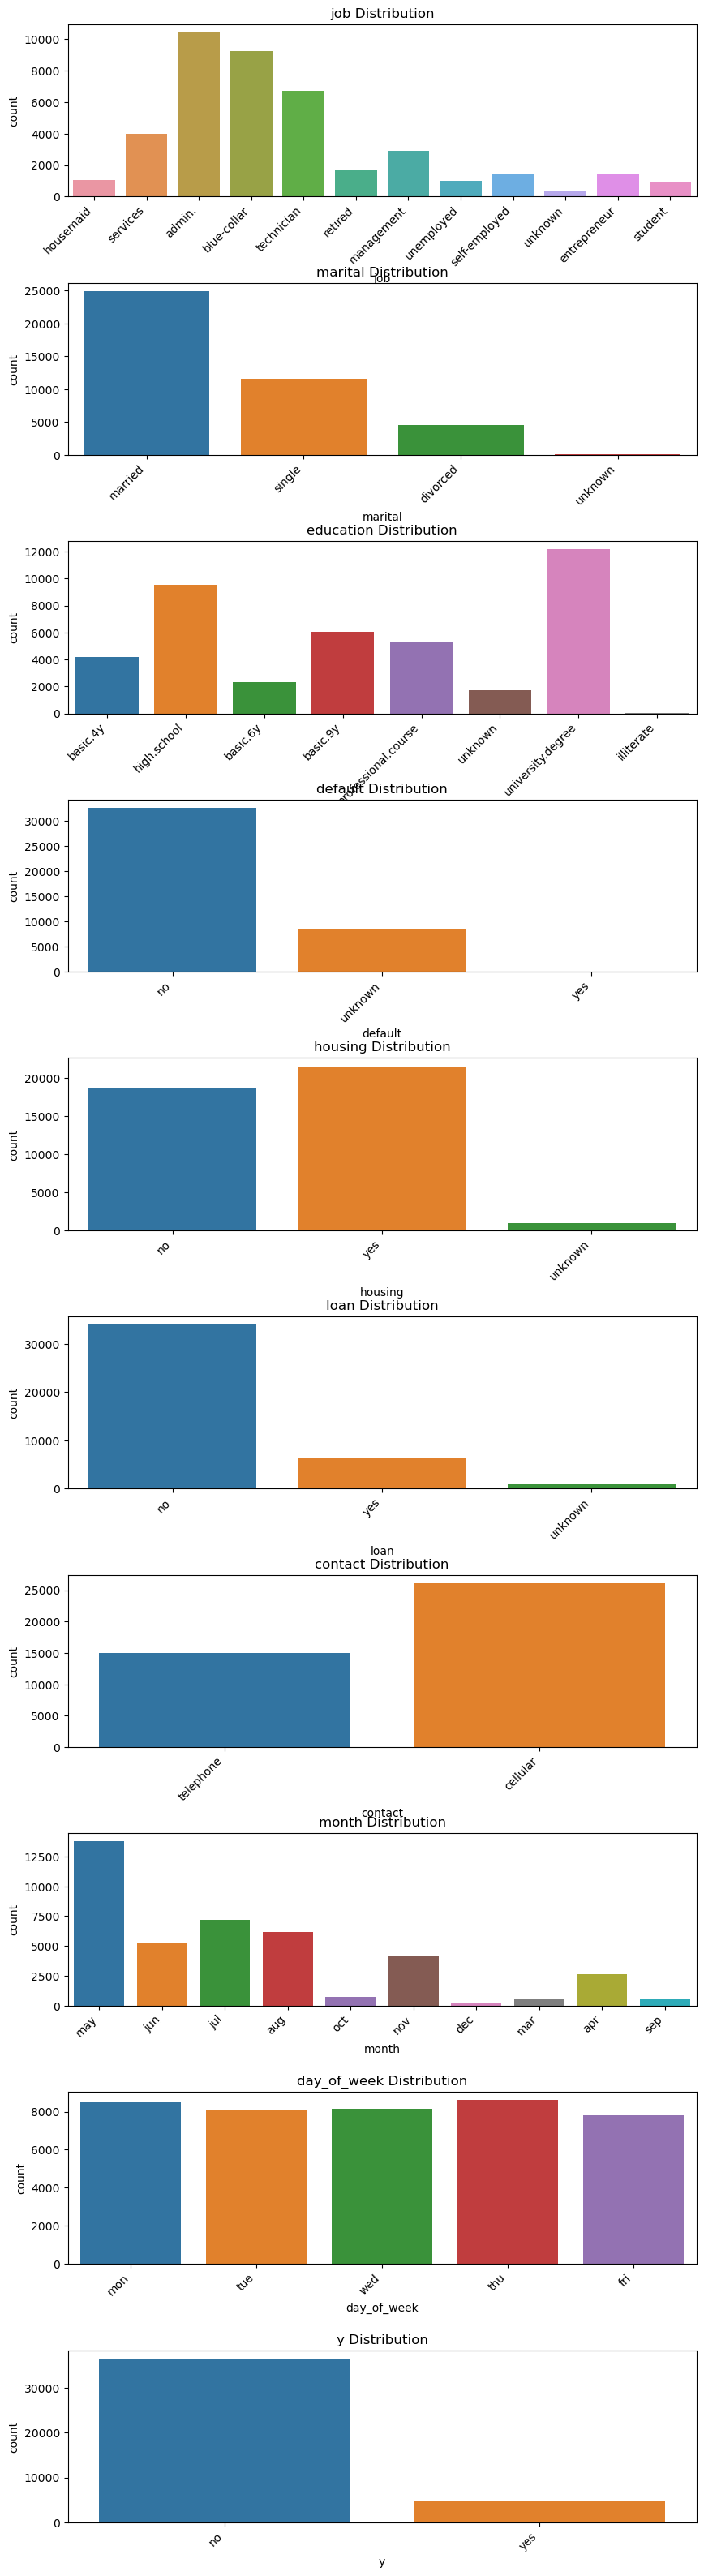

In [21]:
# Filter kolom yang bertipe objek
object_columns = df.select_dtypes(include=['object']).columns

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(object_columns), ncols=1, figsize=(10, 4 * len(object_columns)))
fig.subplots_adjust(hspace=0.5)

# Bar plot untuk data bertipe objek dengan label sumbu x miring
for i, column in enumerate(object_columns):
    ax = sns.countplot(x=column, data=df, ax=axes[i])
    ax.set_title(f'{column} Distribution')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Menambah label sumbu x miring

plt.show()

### C.4.2 Histogram seluruh atribut

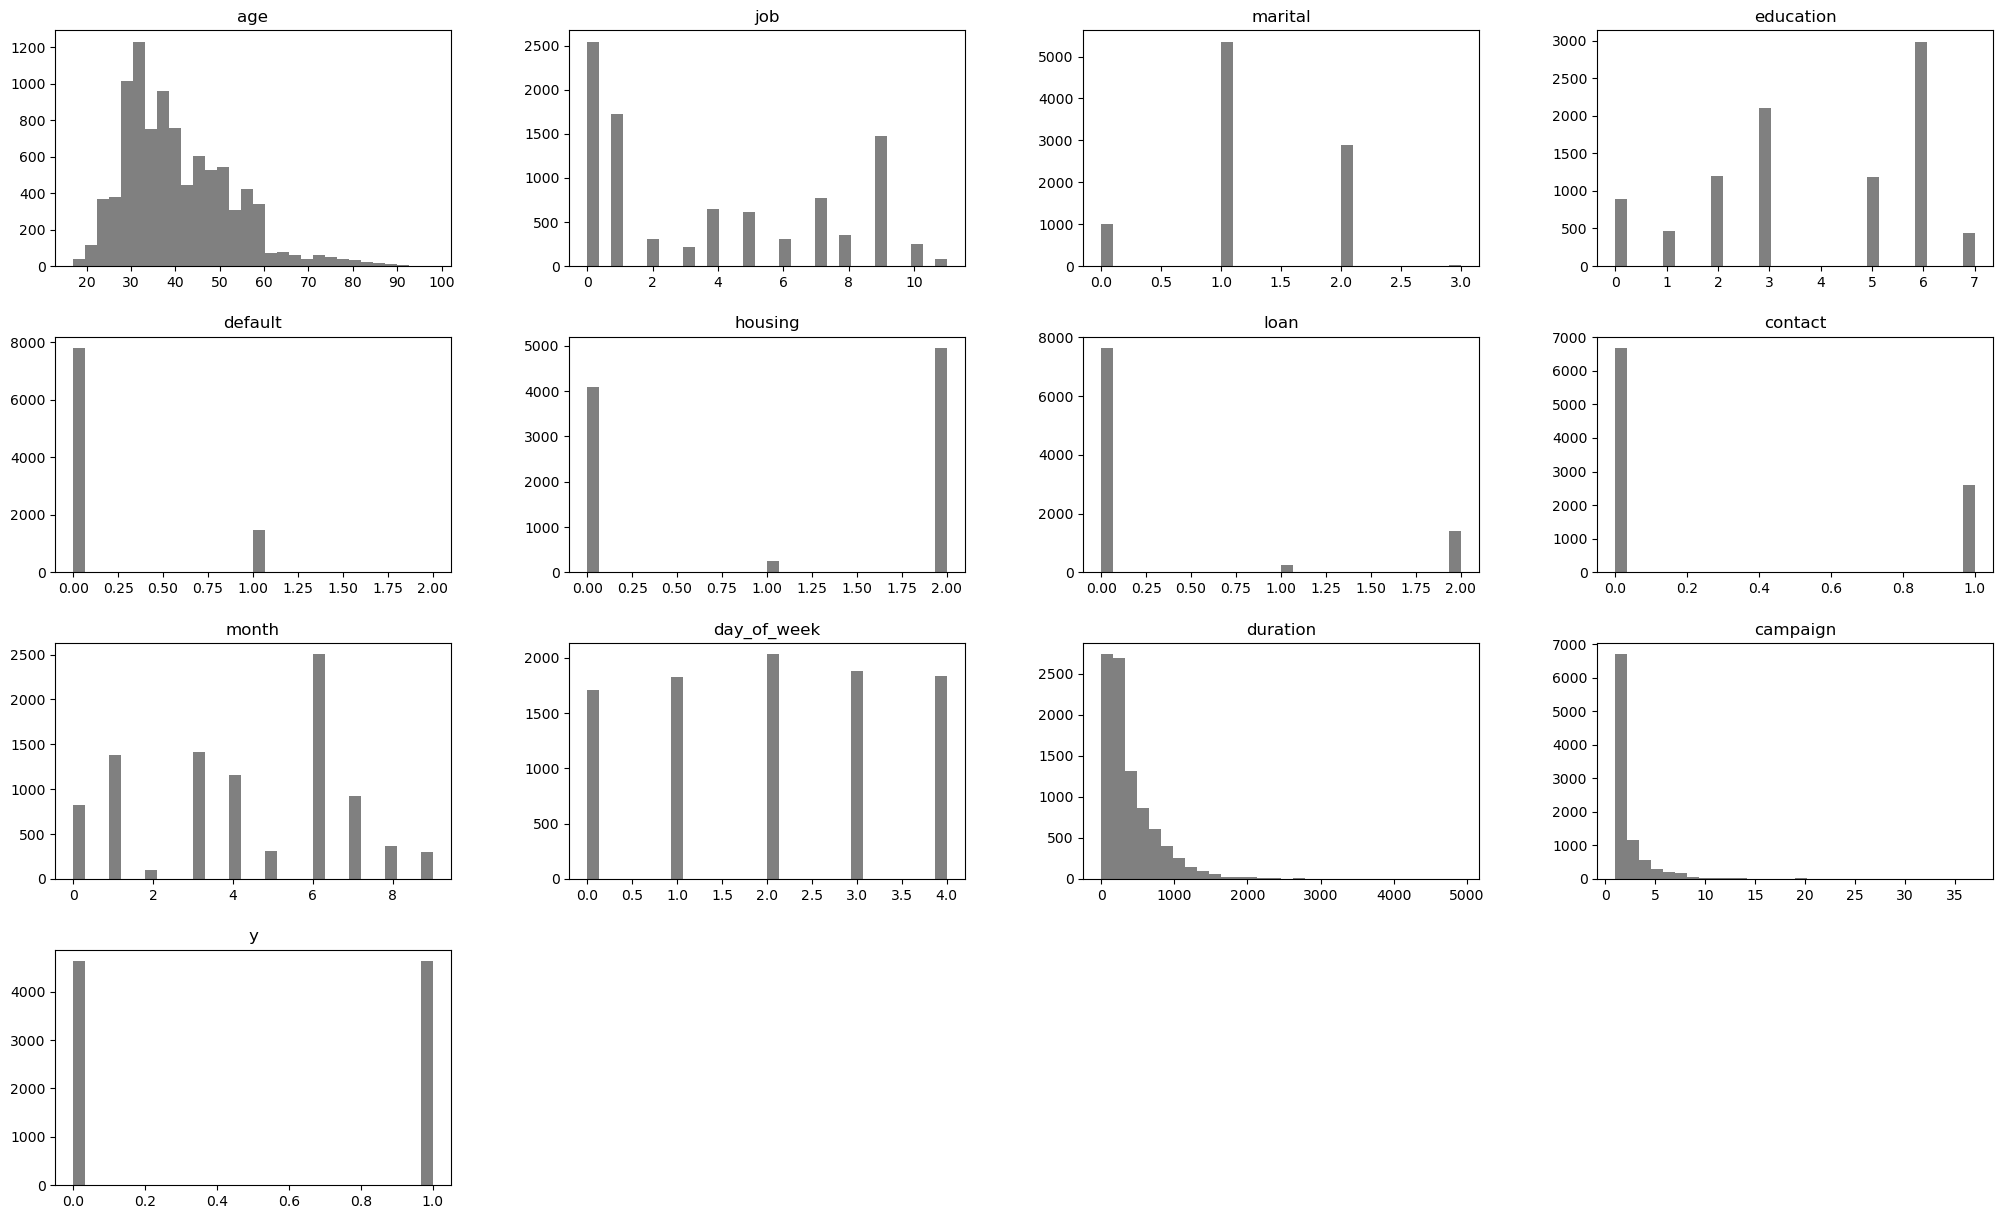

In [22]:
df_undersampling.hist(bins=30, figsize=(25, 15), color='grey', grid=False)
plt.show()

### C.4.3. Heatmap korelasi

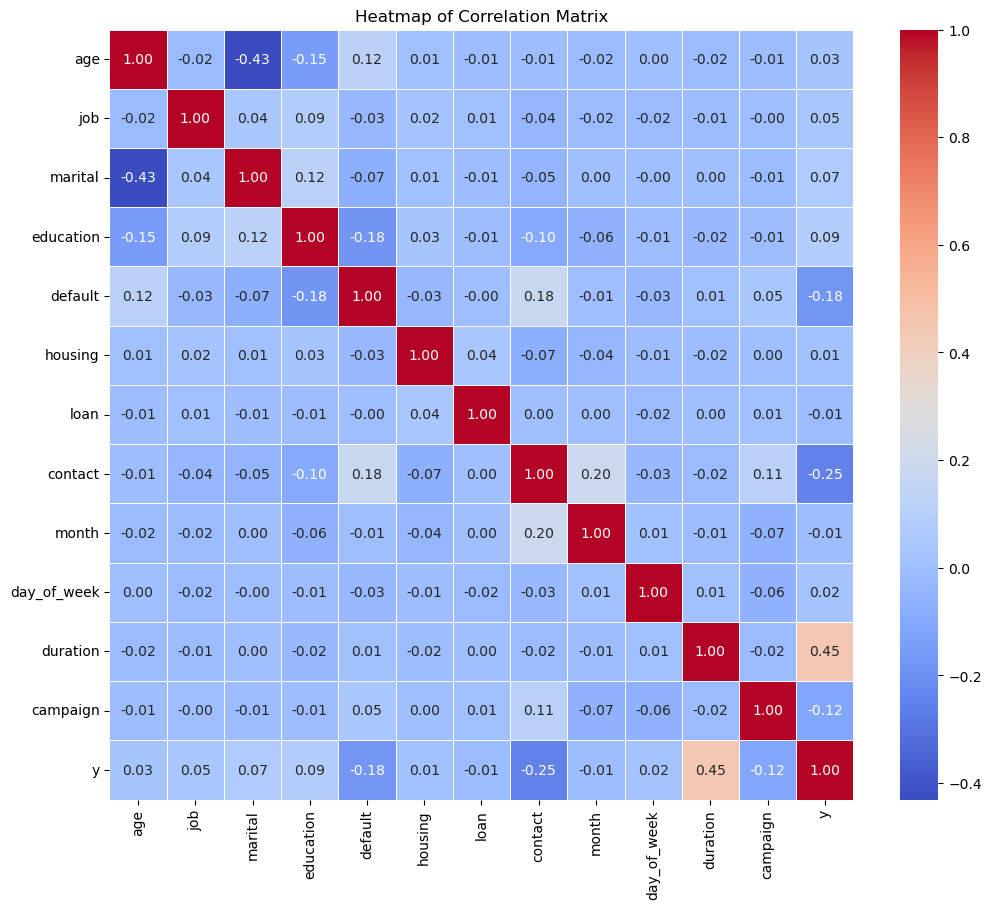

In [23]:
# Matriks korelasi
correlation_matrix = df_undersampling.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Heatmap korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Heatmap of Correlation Matrix')
plt.show()

## C.5. Data Splitting (Pemisahan Data)
Memisahkan data menjadi set pelatihan dan set pengujian untuk mengukur kinerja model secara objektif.

In [24]:
from sklearn.model_selection import train_test_split

# Memisahkan variabel input (X) dan variabel output (y)
x = df_undersampling.drop('y', axis=1)
y = df_undersampling['y']

# Membagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data latih dan data uji
print("Ukuran Data Latih (X_train, y_train):", x_train.shape, y_train.shape)
print("Ukuran Data Uji (X_test, y_test):", x_test.shape, y_test.shape)

Ukuran Data Latih (X_train, y_train): (7422, 12) (7422,)
Ukuran Data Uji (X_test, y_test): (1856, 12) (1856,)


Ini berarti:
- Data latih memiliki 7422 baris dan 12 kolom.</br>
- Data uji memiliki 1856 baris dan 12 kolom.</br>
Ukuran data train dan data test sudah terlihat tepat.

In [25]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# D. Data Modelling

In [26]:
accuracy_list= []

## D.1. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Inisialisasi model Logistic Regression
lr = LogisticRegression(random_state=42,  max_iter=1000)

# Melatih model pada data latih
lr.fit(x_train_scaled, y_train)

# Memprediksi kelas untuk data uji
y_pred_lr = lr.predict(x_test_scaled)

# Menghitung akurasi dan menyimpannya ke dalam accuracy_list
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_list.append(accuracy_lr)

# Menampilkan hasil akurasi
print("Akurasi Model Logistic Regression:", accuracy_lr)

Akurasi Model Logistic Regression: 0.7839439655172413


In [28]:
# Classification report
report = classification_report(y_test, y_pred_lr)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       925
           1       0.79      0.77      0.78       931

    accuracy                           0.78      1856
   macro avg       0.78      0.78      0.78      1856
weighted avg       0.78      0.78      0.78      1856



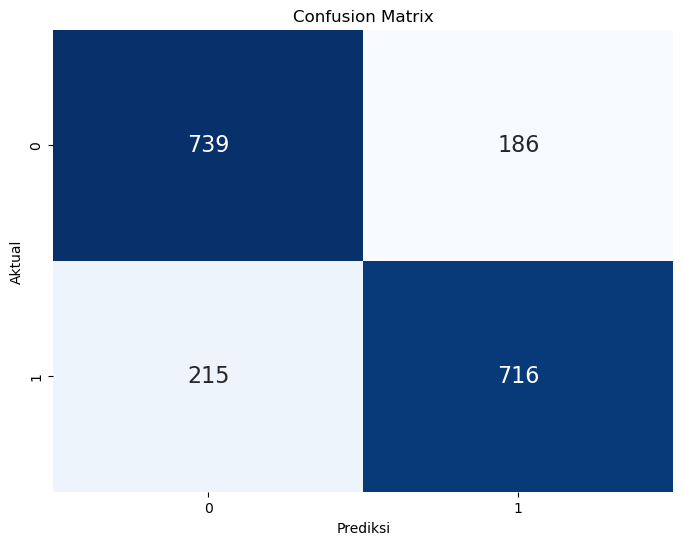

In [29]:
# Membuat confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
print("Confusion Matrix :", "\n", cm_lr)

Confusion Matrix : 
 [[739 186]
 [215 716]]


Berdasarkan confusion matrix yang diberikan, model klasifikasi menunjukkan kinerja yang baik dengan akurasi sekitar 77%. Meskipun terdapat sejumlah False Positive (186) dan False Negative (215), model berhasil mengklasifikasikan sebagian besar instans positif dan negatif dengan benar, tercermin dari nilai presisi (79%) dan sensitivitas (77%) yang relatif seimbang. Spesifisitas model cukup tinggi (80%), menunjukkan kemampuannya dalam mengidentifikasi dengan akurat instans negatif. 

## D.2. K-Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN dengan jumlah tetangga (n_neighbors) misalnya 5
knn = KNeighborsClassifier(n_neighbors=5)

# Melatih model pada data latih
knn.fit(x_train_scaled, y_train)

# Memprediksi kelas untuk data uji
y_predknn = knn.predict(x_test_scaled)

# Menghitung akurasi dan menyimpannya ke dalam accuracy_list
accuracy_knn = accuracy_score(y_test, y_predknn)
accuracy_list.append(accuracy_knn)

# Menampilkan hasil akurasi
print("Akurasi Model KNN:", accuracy_knn)

Akurasi Model KNN: 0.7483836206896551


In [32]:
# Classification report
report = classification_report(y_test, y_predknn)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.78      0.76       925
           1       0.77      0.72      0.74       931

    accuracy                           0.75      1856
   macro avg       0.75      0.75      0.75      1856
weighted avg       0.75      0.75      0.75      1856



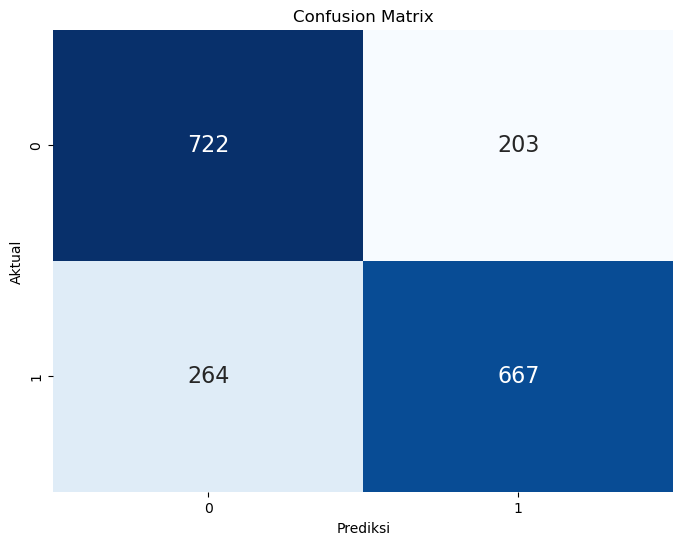

In [33]:
# Membuat confusion matrix
cm_knn = confusion_matrix(y_test, y_predknn)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
print("Confusion Matrix :", "\n", cm_knn)

Confusion Matrix : 
 [[722 203]
 [264 667]]


Dari confusion matrix untuk model KNN yang diberikan kita dapat menyimpulkan performa model pada data uji sebagai berikut:
- True Positive (TP): 722
- True Negative (TN): 667
- False Positive (FP): 203
- False Negative (FN): 264</br>
Berdasarkan confusion matrix yang diberikan, model klasifikasi menunjukkan kinerja yang perlu diperhatikan dengan akurasi sekitar 71%. Model cenderung menghasilkan sejumlah False Positive (203) dan False Negative (264). Meskipun sensitivitas (72%) dan spesifisitas (78%) relatif seimbang, terdapat potensi untuk meningkatkan presisi (77%). 

## D.3. Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree
dt = DecisionTreeClassifier()

# Melatih model pada data latih
dt.fit(x_train_scaled, y_train)

# Memprediksi kelas untuk data uji
y_pred_dt = dt.predict(x_test_scaled)

# Menghitung akurasi dan menyimpannya ke dalam accuracy_list
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_list.append(accuracy_dt)

# Menampilkan hasil akurasi
print("Akurasi Model Decision Tree:", accuracy_dt)

Akurasi Model Decision Tree: 0.7936422413793104


In [36]:
# Classification report
report = classification_report(y_test, y_pred_dt)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       925
           1       0.81      0.77      0.79       931

    accuracy                           0.79      1856
   macro avg       0.79      0.79      0.79      1856
weighted avg       0.79      0.79      0.79      1856



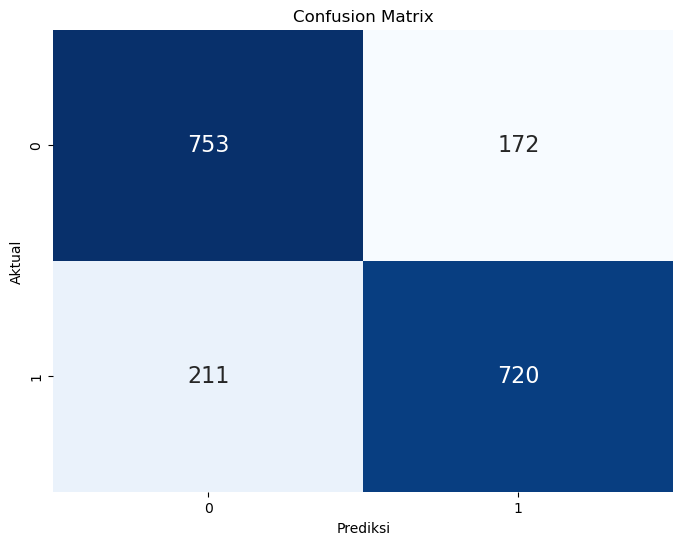

In [37]:
# Membuat confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
print("Confusion Matrix :", "\n", cm_dt)

Confusion Matrix : 
 [[753 172]
 [211 720]]


- True Positive (TP): 720
- True Negative (TN): 753
- False Positive (FP): 172
- False Negative (FN): 211

Berdasarkan confusion matrix yang diberikan, model klasifikasi menunjukkan kinerja yang baik dengan akurasi sekitar 77%. Model berhasil mengklasifikasikan sebagian besar instans positif dan negatif dengan benar, tercermin dari nilai presisi (81%) dan sensitivitas (77%) yang cukup seimbang. Terdapat 172 False Positive (FP), menunjukkan sejumlah kecil kasus di mana model salah mengklasifikasikan instans yang sebenarnya negatif sebagai positif. Keseluruhan, model ini dapat dianggap solid, dan dapat menyesuaikan parameter atau threshold prediksi sesuai dengan tujuan spesifik.

## D.4. Support Vector Machine
Support Vector Machine (SVM) adalah algoritma pembelajaran mesin untuk klasifikasi dan regresi. Tujuannya adalah menemukan hyperplane optimal yang memaksimalkan margin antara kelas dalam data. SVM dapat menangani berbagai tipe data, terutama dalam dimensi tinggi, dan pemilihan kernel serta parameter C merupakan faktor kunci dalam konfigurasi model. Keunggulan SVM meliputi kemampuannya menangani kompleksitas model dan performa yang baik dalam aplikasi seperti pengenalan pola, bioinformatika, dan analisis teks.

In [39]:
from sklearn.svm import SVC

In [40]:
# Inisialisasi model SVM
svm = SVC(kernel='linear', random_state=42)

# Melatih model pada data latih
svm.fit(x_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [41]:
# Memprediksi kelas untuk data uji
y_pred_svm = svm.predict(x_test_scaled)

# Menghitung akurasi dan menyimpannya ke dalam accuracy_list
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_list.append(accuracy_svm)

# Menampilkan hasil akurasi
print("Akurasi Model SVM:", accuracy_svm)

Akurasi Model SVM: 0.7882543103448276


In [42]:
# Classification report
report = classification_report(y_test, y_pred_svm)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       925
           1       0.80      0.77      0.78       931

    accuracy                           0.79      1856
   macro avg       0.79      0.79      0.79      1856
weighted avg       0.79      0.79      0.79      1856



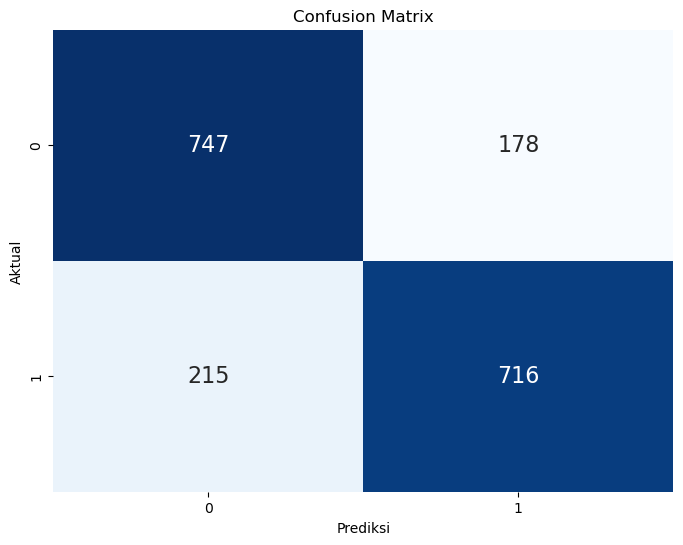

In [43]:
# Membuat confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
print("Confusion Matrix :", "\n", cm_svm)

Confusion Matrix : 
 [[747 178]
 [215 716]]


Berdasarkan confusion matrix yang diberikan, model klasifikasi memiliki performa yang solid dengan akurasi sekitar 77%. Model tersebut berhasil mengklasifikasikan sebagian besar instans positif dan negatif secara benar, terlihat dari nilai presisi (80%) dan spesifisitas (81%) yang tinggi. Sensitivitas yang relatif baik (77%) menunjukkan kemampuan model untuk mendeteksi sebagian besar instance positif. 

## D.5. Random Forest
Random Forest adalah algoritma ensemble learning yang membangun sejumlah besar pohon keputusan dengan menggunakan subset acak dari data pelatihan dan fitur. Prediksi akhir diambil dengan mengambil suara mayoritas dari hasil prediksi setiap pohon. Dengan keberagaman model dan kemampuannya mengatasi overfitting, Random Forest efektif untuk tugas klasifikasi dan regresi.

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf = RandomForestClassifier()

# Melatih model pada data latih
rf.fit(x_train_scaled, y_train)

# Memprediksi kelas untuk data uji
y_pred_rf = rf.predict(x_test_scaled)

# Menghitung akurasi dan menyimpannya ke dalam accuracy_list
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_list.append(accuracy_rf)

# Menampilkan hasil akurasi
print("Akurasi Model Random Forest:", accuracy_rf)

Akurasi Model Random Forest: 0.8485991379310345


In [46]:
# Classification report
report = classification_report(y_test, y_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       925
           1       0.84      0.87      0.85       931

    accuracy                           0.85      1856
   macro avg       0.85      0.85      0.85      1856
weighted avg       0.85      0.85      0.85      1856



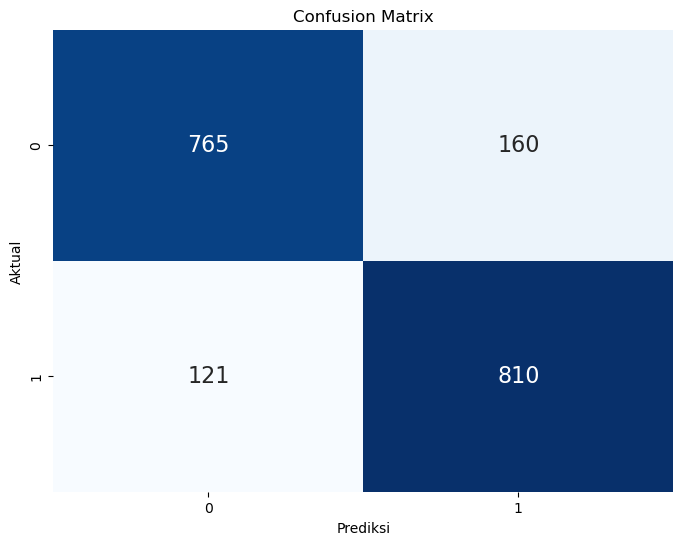

In [47]:
# Membuat confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [48]:
print("Confusion Matrix :", "\n", cm_rf)

Confusion Matrix : 
 [[765 160]
 [121 810]]


- True Positive (TP): 765
- True Negative (TN): 810
- False Positive (FP): 160
- False Negative (FN): 121</br>
Berdasarkan confusion matrix yang diberikan, model klasifikasi menunjukkan kinerja yang sangat baik dengan akurasi sekitar 85%. Model berhasil mengklasifikasikan sebagian besar instans positif dan negatif dengan benar, tercermin dari nilai presisi (84%) dan sensitivitas (87%) yang tinggi. Spesifisitas model juga tinggi (83%), menunjukkan kemampuannya dalam mengidentifikasi dengan akurat instans negatif. 

## D.6. Naive Bayes
Naive Bayes adalah algoritma klasifikasi probabilistik yang berdasarkan teorema Bayes. Model ini diasumsikan "naif" karena mengasumsikan independensi antar-fitur, meskipun kenyataannya tidak selalu terpenuhi. Naive Bayes sering digunakan dalam pemodelan teks dan klasifikasi dokumen, serta tugas klasifikasi lainnya, karena kecepatan pelatihannya yang tinggi dan kinerja yang baik dalam beberapa skenario.

In [49]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes dengan asumsi distribusi multinomial
nb = GaussianNB()

# Melatih model pada data latih yang telah diskalakan
nb.fit(x_train_scaled, y_train)

# Memprediksi kelas untuk data uji yang telah diskalakan
y_pred_nb = nb.predict(x_test_scaled)

# Menghitung akurasi dan menyimpannya ke dalam accuracy_list
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_list.append(accuracy_nb)

# Menampilkan hasil akurasi
print("Akurasi Model Naive Bayes:", accuracy_nb)

Akurasi Model Naive Bayes: 0.7257543103448276


In [50]:
# Classification report
report_nb = classification_report(y_test, y_pred_nb)
print(report_nb)

              precision    recall  f1-score   support

           0       0.80      0.60      0.69       925
           1       0.68      0.85      0.76       931

    accuracy                           0.73      1856
   macro avg       0.74      0.73      0.72      1856
weighted avg       0.74      0.73      0.72      1856



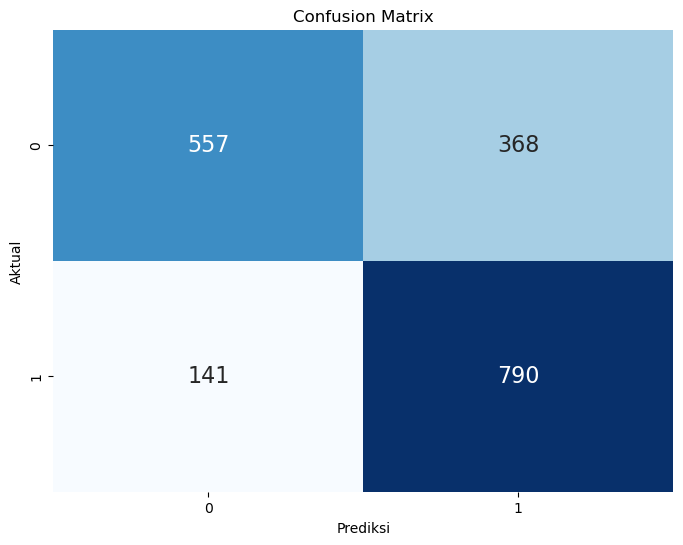

In [51]:
# Membuat confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [52]:
print("Confusion Matrix :", "\n", cm_nb)

Confusion Matrix : 
 [[557 368]
 [141 790]]


Berdasarkan confusion matrix yang diberikan, model klasifikasi menunjukkan kinerja yang perlu diperhatikan dengan akurasi sekitar 72%. Model ini berhasil mengklasifikasikan sebagian besar instans positif dan negatif dengan benar, tercermin dari nilai presisi (68%) dan sensitivitas (85%) yang relatif seimbang. Meskipun terdapat sejumlah False Positive (368), jumlah False Negative (141) lebih rendah, menunjukkan bahwa model cenderung lebih berhati-hati dalam mengklasifikasikan instance positif. 

# Kesimpulan

In [53]:
accuracy_list

[0.7839439655172413,
 0.7483836206896551,
 0.7936422413793104,
 0.7882543103448276,
 0.8485991379310345,
 0.7257543103448276]

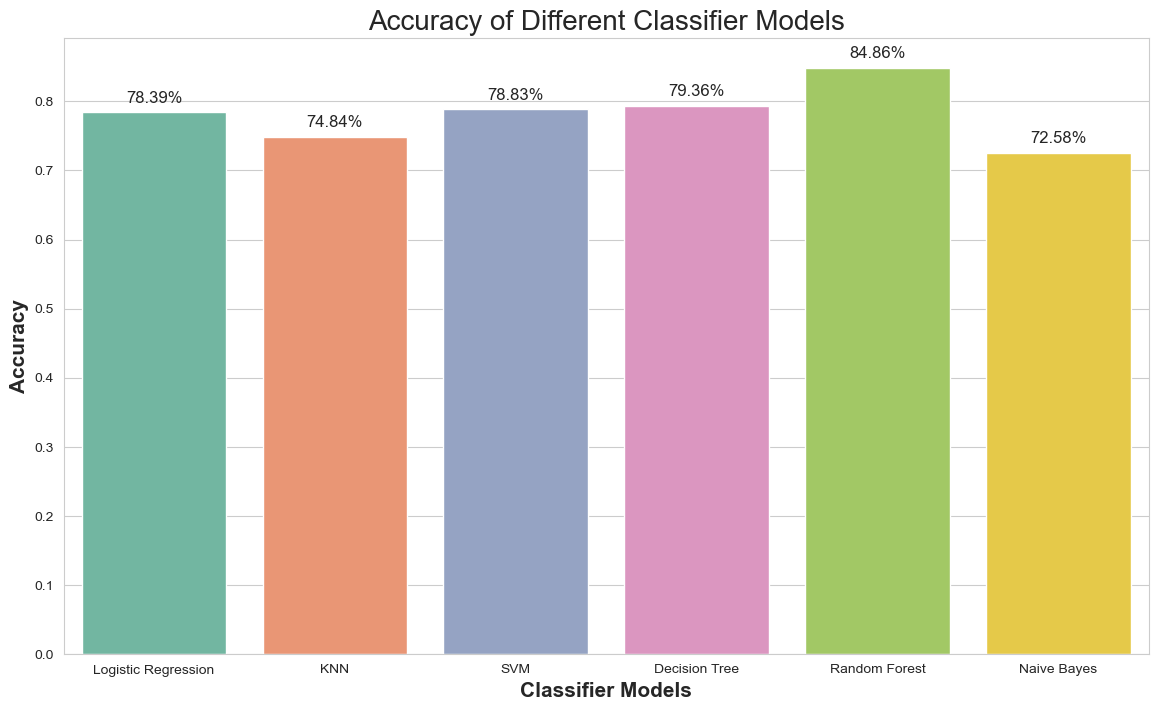

In [57]:
# Data
model_list = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes']
accuracy_list = [accuracy_lr, accuracy_knn, accuracy_svm, accuracy_dt, accuracy_rf, accuracy_nb]

# Pengaturan Plot dengan palet 'Set2'
plt.figure(figsize=(14, 8))
sns.set_style('whitegrid')
colors = sns.color_palette('Set2')

# Plot Bar
ax = sns.barplot(x=model_list, y=accuracy_list, palette=colors)

# Menambahkan Label dan Judul
plt.xlabel('Classifier Models', fontsize=15, fontweight='bold')
plt.ylabel('Accuracy', fontsize=15, fontweight='bold')
plt.title('Accuracy of Different Classifier Models', fontsize=20)

# Menambahkan Label pada Bar
for i, v in enumerate(accuracy_list):
    ax.text(i, v + 0.01, f'{round(v * 100, 2)}%', ha='center', va='bottom', fontsize=12)

# Menampilkan Plot
plt.show()

**Kesimpulan**

Berdasarkan nilai akurasi (accuracy) dari berbagai model klasifikasi yang diukur pada data uji, dapat disimpulkan bahwa model Random Forest memiliki kinerja tertinggi dengan akurasi sekitar 84.86%. Disusul oleh model Support Vector Machine (SVM) dengan akurasi sekitar 79.36%, dan model Decision Tree dengan akurasi sekitar 78.83%. Sementara itu, model Logistic Regression, K-Nearest Neighbors (KNN), dan Naive Bayes memiliki akurasi masing-masing sekitar 78.39%, 74.84%, dan 72.58%.

Dengan demikian, untuk kasus klasifikasi ini, Random Forest mungkin menjadi pilihan yang baik berdasarkan akurasi tertinggi.